# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
import numpy as np

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# read csv to get sign names
sign_names = []
with open('signnames.csv') as signname_file:
    signname_reader = csv.DictReader(signname_file)
    sign_names = [row['SignName'] for row in signname_reader]

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

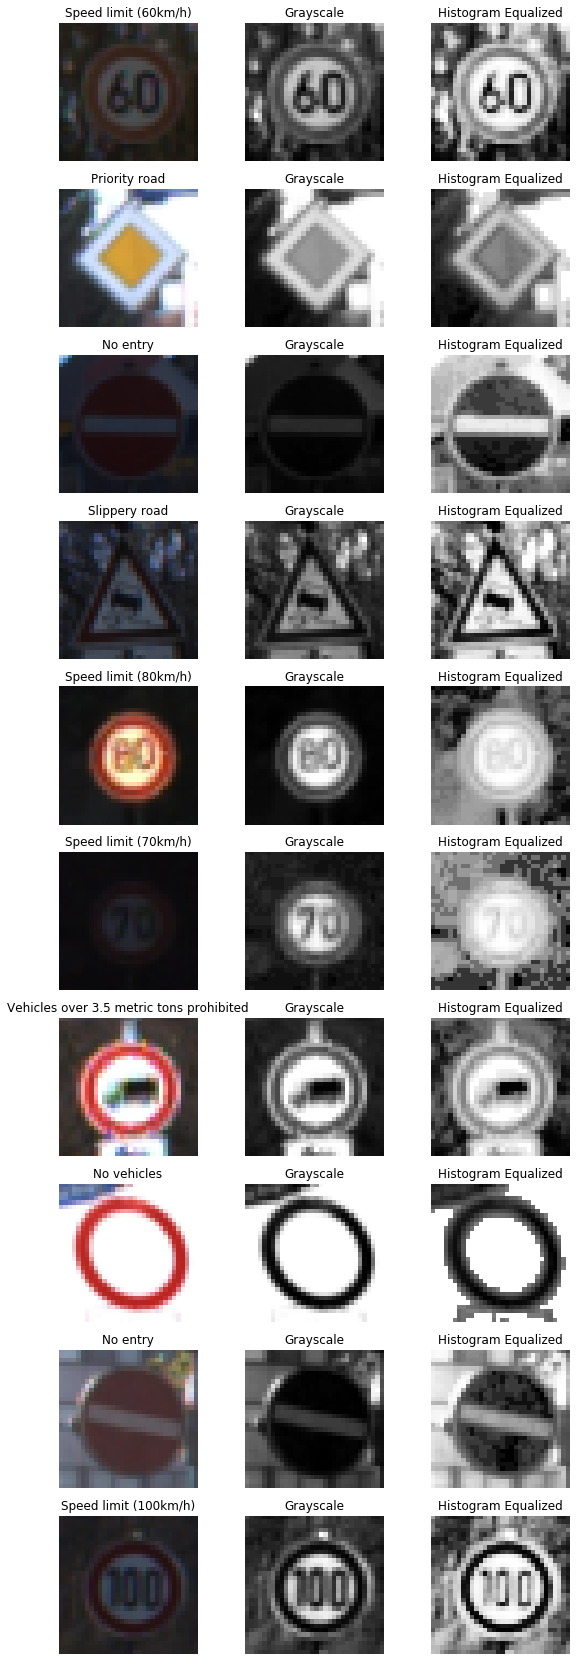

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of N random data points
count = 10
fig, axs = plt.subplots(count, 3, figsize=(count, count*3))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(0, count*3, 3):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(sign_names[y_train[index]])

    bw = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    axs[i+1].axis('off')
    axs[i+1].imshow(bw, cmap='gray')
    axs[i+1].set_title("Grayscale")

    equ = cv2.equalizeHist(bw)
    axs[i+2].axis('off')
    axs[i+2].imshow(equ, cmap='gray')
    axs[i+2].set_title("Histogram Equalized")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
def preproc(image):
    gray = np.array(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    eq = np.array(cv2.equalizeHist(gray))
    eq = eq[..., np.newaxis]
    norm = eq - np.mean(eq)
    return norm

In [5]:
# convert to grayscale
# train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_train])
# valid_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_valid])
# test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_test])

# apply histogram equalization
# train_eq = np.array([cv2.equalizeHist(image) for image in train_gray])
# valid_eq = np.array([cv2.equalizeHist(image) for image in valid_gray])
# test_eq = np.array([cv2.equalizeHist(image) for image in test_gray])

# append a dimension
# train_eq = train_eq[..., np.newaxis]
# valid_eq = valid_eq[..., np.newaxis]
# test_eq = test_eq[..., np.newaxis]

# normalization
train_norm = [preproc(image) for image in X_train]
valid_norm = [preproc(image) for image in X_valid]
test_norm = [preproc(image) for image in X_test]

train = np.append(np.array(train_norm), np.array(valid_norm), axis=0)
label = np.append(np.array(y_train), np.array(y_valid), axis=0)

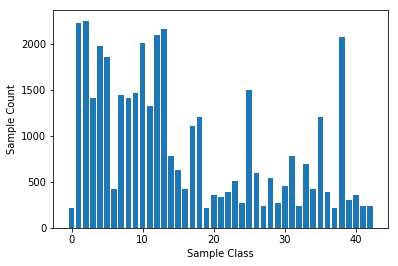

In [6]:
# plotting the count of each sign
y_pos = range(n_classes)
label_list = label.tolist()

sign_type = [label_list.count(y) for y in range(n_classes)]

plt.bar(y_pos, sign_type, width=0.8, align='center')
plt.ylabel('Sample Count')
plt.xlabel('Sample Class')
plt.show()

In [7]:
from scipy.ndimage import interpolation as ip

def augment(img):
    if (random.choice([True, False])):
        img = ip.shift(img, [random.randrange(-2, 2), random.randrange(-2, 2), 0])
    else:
        img = ip.rotate(img, random.randrange(-10, 10), reshape=False)
    return img

In [8]:
# Data Augmentation
augmented_feat = []
augmented_label = []

target_num = 2000

for class_index in range(len(sign_type)):
    class_sample_count = sign_type[class_index]
    augment_num = round(target_num / class_sample_count)

    if augment_num <= 1:
        continue
    
    print("Class {:d} has only {:d} samples, hence augmenting {:d} times.".format(
        class_index, class_sample_count, augment_num))
    for test_feature, test_label in zip(train_norm, y_train):
        if class_index == test_label:
            for i in range(augment_num):
                augmented_feat.append(augment(test_feature))
                augmented_label.append(test_label)

# append generated data to original data
train_aug = np.append(np.array(train), np.array(augmented_feat), axis=0)
y_train_aug = np.append(np.array(label), np.array(augmented_label), axis=0)

Class 0 has only 210 samples, hence augmenting 10 times.
Class 6 has only 420 samples, hence augmenting 5 times.
Class 11 has only 1320 samples, hence augmenting 2 times.
Class 14 has only 780 samples, hence augmenting 3 times.
Class 15 has only 630 samples, hence augmenting 3 times.
Class 16 has only 420 samples, hence augmenting 5 times.
Class 17 has only 1110 samples, hence augmenting 2 times.
Class 18 has only 1200 samples, hence augmenting 2 times.
Class 19 has only 210 samples, hence augmenting 10 times.
Class 20 has only 360 samples, hence augmenting 6 times.
Class 21 has only 330 samples, hence augmenting 6 times.
Class 22 has only 390 samples, hence augmenting 5 times.
Class 23 has only 510 samples, hence augmenting 4 times.
Class 24 has only 270 samples, hence augmenting 7 times.
Class 26 has only 600 samples, hence augmenting 3 times.
Class 27 has only 240 samples, hence augmenting 8 times.
Class 28 has only 540 samples, hence augmenting 4 times.
Class 29 has only 270 sample

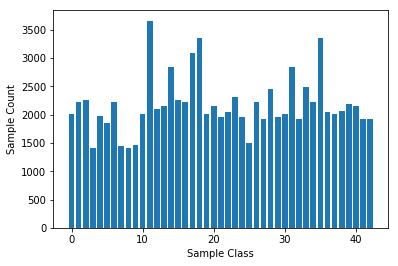

In [9]:
# plotting the count of each sign
y_pos = range(n_classes)
label_list = y_train_aug.tolist()

sign_type = [label_list.count(y) for y in range(n_classes)]

plt.bar(y_pos, sign_type, width=0.8, align='center')
plt.ylabel('Sample Count')
plt.xlabel('Sample Class')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# create validation set from training data
X_training, X_validation, y_training, y_validation = train_test_split(train_aug, 
                                                                      y_train_aug, test_size=0.15)


### Model Architecture

In [11]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32,32,1), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
model.add(layers.Dropout(0.3))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(86, activation='relu'))

#Output Layer with softmax activation
model.add(layers.Dense(43, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None,

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

model.fit(X_training, y_training, epochs=8, batch_size=512,
          validation_data=(X_validation, y_validation))

Train on 79556 samples, validate on 14040 samples
Epoch 1/8
79556/79556==============================] - 3s 42us/sample - loss: 1.3867 - acc: 0.7048 - val_loss: 0.1629 - val_acc: 0.9594
Epoch 2/8
79556/79556==============================] - 2s 31us/sample - loss: 0.1234 - acc: 0.9640 - val_loss: 0.0763 - val_acc: 0.9786
Epoch 3/8
79556/79556==============================] - 2s 31us/sample - loss: 0.0570 - acc: 0.9829 - val_loss: 0.0568 - val_acc: 0.9844
Epoch 4/8
79556/79556==============================] - 2s 31us/sample - loss: 0.0328 - acc: 0.9904 - val_loss: 0.0387 - val_acc: 0.9902
Epoch 5/8
79556/79556==============================] - 2s 31us/sample - loss: 0.0236 - acc: 0.9927 - val_loss: 0.0354 - val_acc: 0.9905
Epoch 6/8
79556/79556==============================] - 2s 31us/sample - loss: 0.0189 - acc: 0.9941 - val_loss: 0.0293 - val_acc: 0.9934
Epoch 7/8
79556/79556==============================] - 2s 31us/sample - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0294 - val_acc: 0.992

In [13]:
model.evaluate(x=np.array(test_norm),y=np.array(y_test))

model.save('model.h5')

12630/12630==============================] - 1s 41us/sample - loss: 0.3093 - acc: 0.9465


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images with Prediction

Below shows the 5 images I croped from the web, and their respective top-5 prediction by the trained model.

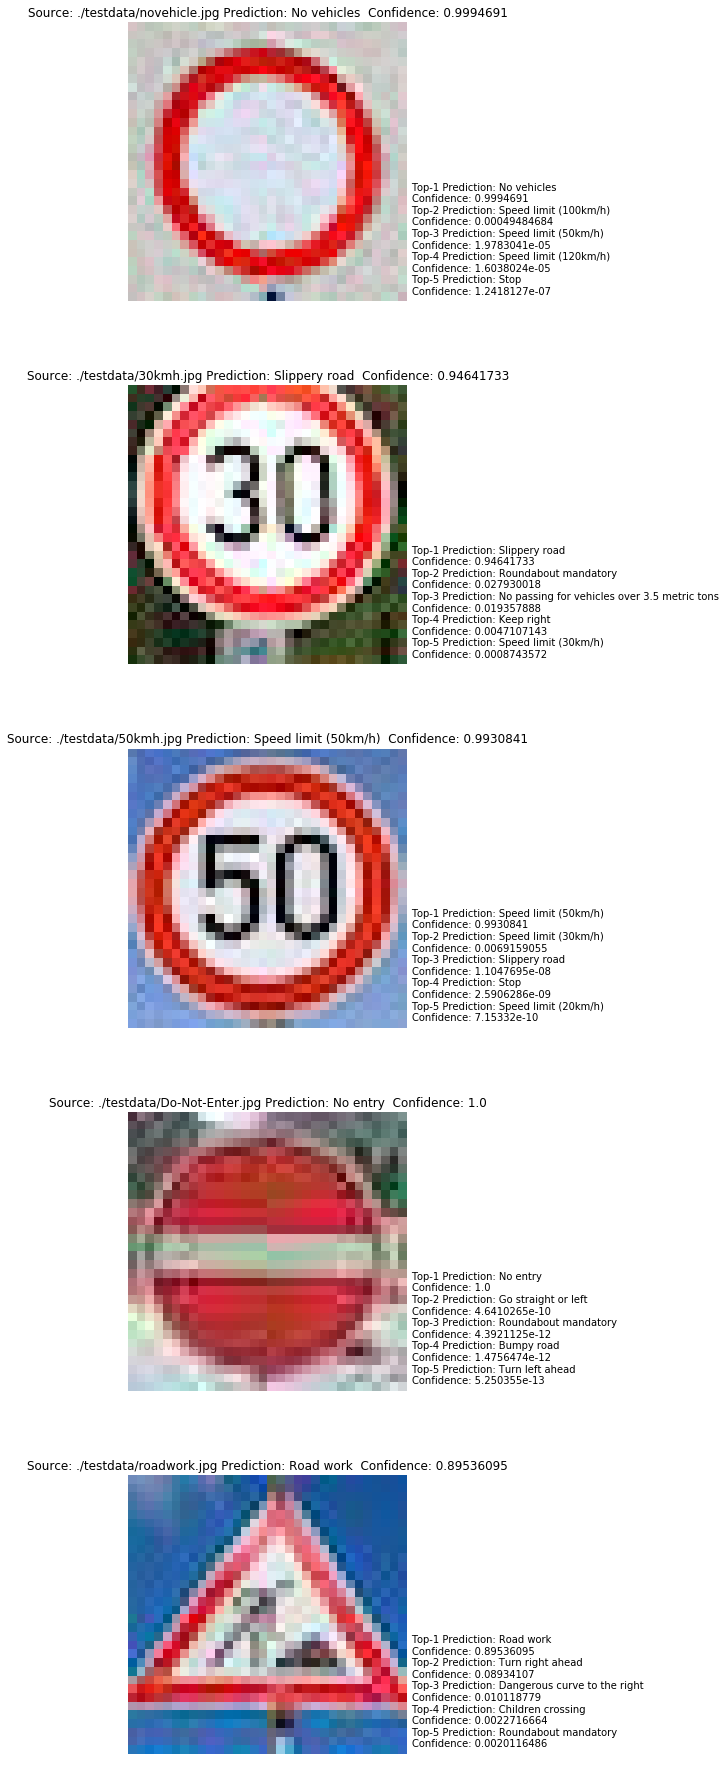

In [20]:
### Load the images and plot them here.
import glob
import heapq

from tensorflow.keras.models import load_model

testdata = glob.glob("./testdata/*.jpg")
model = load_model('model.h5')

fig, axs = plt.subplots(5, 1, figsize=(5, 5))
fig.subplots_adjust(top = 5)
axs = axs.ravel()
for i in range(0, 5):
    t = ""
    image = cv2.imread(testdata[i])
    image = image[...,::-1]
    norm = preproc(image)
    norm = norm[np.newaxis, ...]
    yy = model.predict(norm, batch_size=None, verbose=0, steps=None, callbacks=None)
    top5 = heapq.nlargest(5, yy[0])
    top5_index = np.argsort(-yy[0])
    conf = np.max(yy)
    yy = np.argmax(yy)
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title("Source: " + testdata[i] + " Prediction: " + sign_names[yy] + "  Confidence: " + str(conf))
    for j in range(0,5):
        t += ("Top-" + str(j+1) + " Prediction: " + sign_names[top5_index[j]] + "\n" + "Confidence: " + str(top5[j]) + "\n")
    axs[i].text(32, 32, t, ha='left', wrap=True)
plt.show()